<a href="https://colab.research.google.com/github/Manasvivek/FMML_projects_and_labs/blob/main/performance_metrics(module3_lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter


def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

X_train = np.array([[25, 30000],
                   [30, 40000],
                   [35, 50000],
                   [40, 60000],
                   [45, 70000]])

y_train = np.array([0, 0, 0, 1, 0])  # 0: Dislike, 1: Like


X_test = np.array([32, 45000])

k = 3


pr=predict(X_train, y_train, X_test, k)
print(pr)
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

# The below function calculates the accuracy of the knn classifier
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)
print(predictions)
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))





0
[0 1 2 1 1 1 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2 1 0 1 1 0 1 2 1 1 2 1 0]
The accuracy of our classifier is 94.0 %
The accuracy of Sklearn classifier is 94.0 %


In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

# ANS :

def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)
    print(distances)  # prints the distances
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    print(targets)  #prints the k nearest neighbours
    frequency= Counter(targets).most_common(1)[0][0]
    print(frequency)
    return distances,targets

X_train = np.array([[25, 30000],
                   [30, 40000],
                   [35, 50000],
                   [40, 60000],
                   [45, 70000]])

y_train = np.array([0, 0, 0, 1, 0])  # 0: Dislike, 1: Like


X_test = np.array([32, 45000])

k = 3

pr=predict(X_train, y_train, X_test, k)


[[5000.000399999984, 1], [5000.000899999919, 2], [15000.001633333244, 0], [15000.002133333182, 3], [25000.003379999773, 4]]
[0, 0, 0]
0


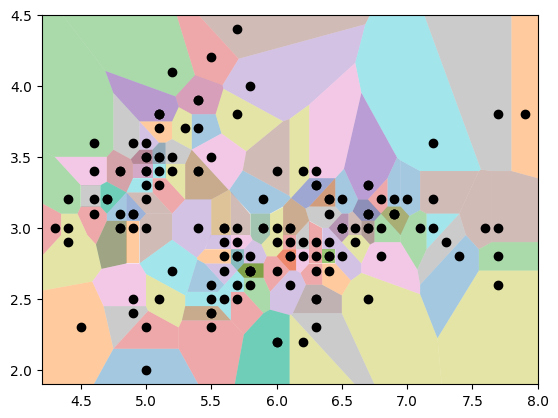

In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

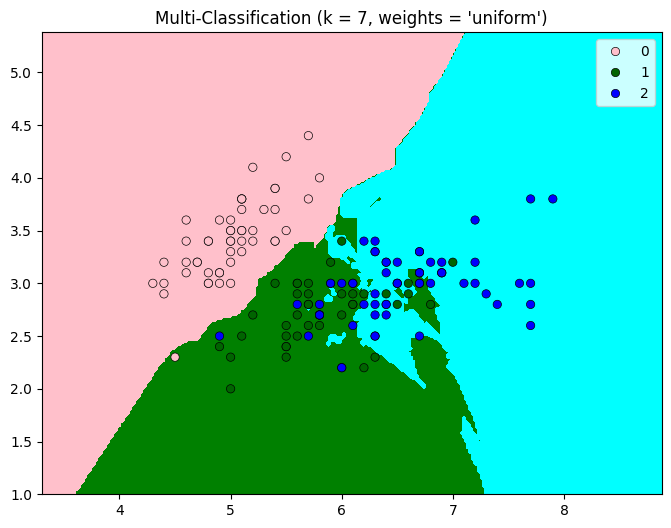

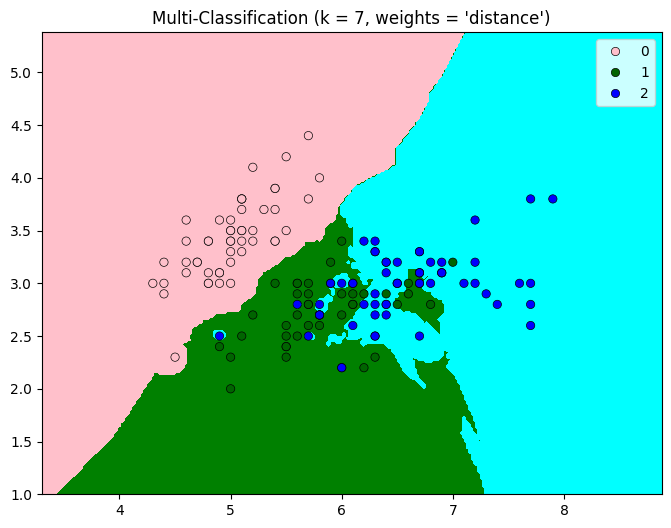

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()

x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

Text(0.5, 23.52222222222222, 'Predicted label')

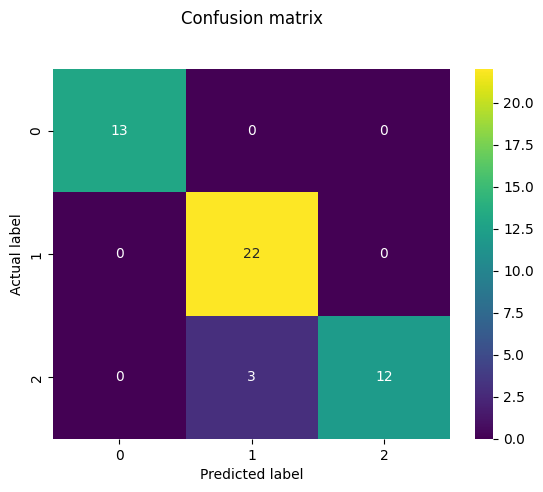

In [ ]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
#Task 2: Performing the above problem  using PCA(Principal component analysis):
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris_data= load_iris().data
print("Features :" ,iris_data.shape)

iris_labels = np.reshape(load_iris().target, (150,1))
print("Target:", iris_labels.shape)


final_iris_data = np.concatenate([iris_data, iris_labels],axis=1)
iris_dataset = pd.DataFrame(final_iris_data )

features =load_iris().feature_names
features_labels = np.append(features,'label')
iris_dataset.columns = features_labels
iris_dataset.head(10)

X = iris_dataset.iloc[:,:4].values
y = iris_dataset.iloc[:,4].values

print(np.shape(X), np.shape(y))

Features : (150, 4)
Target: (150, 1)
(150, 4) (150,)


In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

1.0


In [11]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [12]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print("Covariance matrix first 10 rows and columns:")
print(cov_mat[0:10, 0:10])

Covariance matrix first 10 rows and columns:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [13]:
cov_mat.shape

(4, 4)

In [14]:
# simpler way of doing this
cov_mat_numpy = np.cov(X_std.T)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:10, 0:10])

Covariance matrix first 5 rows and columns:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [15]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals.shape, eig_vecs.shape

((4,), (4, 4))

Explained variance:
[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]
Cumulative explained variance:
[ 72.96244541  95.8132072   99.48212909 100.        ]


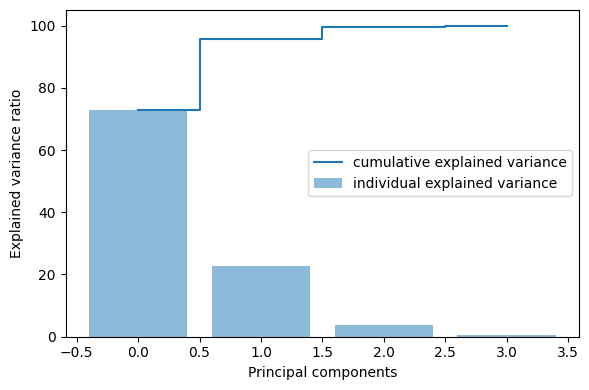

In [17]:
# computin the principal components
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

# Plotting the variance explained by each component and the cumulative variance explained

plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

we can see that the first principal component  explains almost 70% of the given data


In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[-2.26470281 -0.4800266  -0.12770602]
 [-2.08096115  0.67413356 -0.23460885]
 [-2.36422905  0.34190802  0.04420148]
 [-2.29938422  0.59739451  0.09129011]
 [-2.38984217 -0.64683538  0.0157382 ]
 [-2.07563095 -1.48917752  0.02696829]
 [-2.44402884 -0.0476442   0.3354704 ]
 [-2.23284716 -0.22314807 -0.0886955 ]
 [-2.33464048  1.11532768  0.14507686]
 [-2.18432817  0.46901356 -0.25376557]
 [-2.1663101  -1.04369065 -0.2686811 ]
 [-2.32613087 -0.13307834  0.09375924]
 [-2.2184509   0.72867617 -0.23091124]
 [-2.6331007   0.96150673  0.18079608]
 [-2.1987406  -1.86005711 -0.472901  ]
 [-2.26221453 -2.68628449  0.03052661]
 [-2.2075877  -1.48360936 -0.00534409]
 [-2.19034951 -0.48883832 -0.04421532]
 [-1.898572   -1.40501879 -0.37434327]
 [-2.34336905 -1.12784938  0.13263047]
 [-1.914323   -0.40885571 -0.42129259]
 [-2.20701284 -0.92412143  0.15986528]
 [-2.7743447  -0.45834367  0.3321791 ]
 [-1.81866953 -0.08555853  0.0344886 ]
 [-2.22716331 -0.13725446  0.11799354]
 [-1.95184633  0.62561859

In [20]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]
 [-2.07563095  1.48917752 -0.02696829]
 [-2.44402884  0.0476442  -0.3354704 ]
 [-2.23284716  0.22314807  0.0886955 ]
 [-2.33464048 -1.11532768 -0.14507686]
 [-2.18432817 -0.46901356  0.25376557]
 [-2.1663101   1.04369065  0.2686811 ]
 [-2.32613087  0.13307834 -0.09375924]
 [-2.2184509  -0.72867617  0.23091124]
 [-2.6331007  -0.96150673 -0.18079608]
 [-2.1987406   1.86005711  0.472901  ]
 [-2.26221453  2.68628449 -0.03052661]
 [-2.2075877   1.48360936  0.00534409]
 [-2.19034951  0.48883832  0.04421532]
 [-1.898572    1.40501879  0.37434327]
 [-2.34336905  1.12784938 -0.13263047]
 [-1.914323    0.40885571  0.42129259]
 [-2.20701284  0.92412143 -0.15986528]
 [-2.7743447   0.45834367 -0.3321791 ]
 [-1.81866953  0.08555853 -0.0344886 ]
 [-2.22716331  0.13725446 -0.11799354]
 [-1.95184633 -0.62561859

In [23]:
# visualizing the data in 2 and 3 dimensions
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if int(iris_labels[i][0]) == 0:
        dicti["Label"] = "Setosa"
    elif int(iris_labels[i][0]) == 1:
        dicti["Label"] = "Versicolor"
    else:
        dicti["Label"] = "Virginica"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head(10)

<ipython-input-23-affe9649903c>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


,PC1,PC2,PC3,Label
0,-2.264703,-0.480027,-0.127706,Setosa
1,-2.080961,0.674134,-0.234609,Setosa
2,-2.364229,0.341908,0.044201,Setosa
3,-2.299384,0.597395,0.091290,Setosa
4,-2.389842,-0.646835,0.015738,Setosa
5,-2.075631,-1.489178,0.026968,Setosa
6,-2.444029,-0.047644,0.335470,Setosa
7,-2.232847,-0.223148,-0.088695,Setosa
8,-2.334640,1.115328,0.145077,Setosa
9,-2.184328,0.469014,-0.253766,Setosa


In [24]:
import plotly.graph_objects as go
import plotly.express as px

for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")
# this is using only 2 components which make upto 90% of the data

In [25]:
# using 3 principal compenets
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

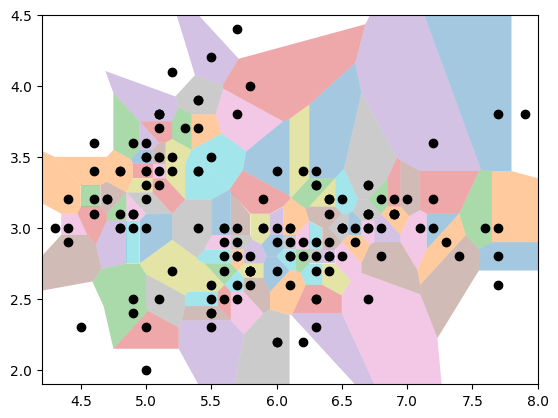

In [29]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.


#Plotting the voronoi diagrams and Decision boundaries for the above pca method :
## Plotting Voronoi regions for the Iris dataset
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite Voronoi regions to finite regions.
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max() * 2

    # Map infinite regions to finite polygons
    for region in vor.regions:
        if not region or -1 in region:
            continue

        new_region = []
        for i in region:
            if i == -1:
                # Infinite vertex
                i1, i2 = vor.ridge_vertices[vor.ridge_vertices.index(region[:2])]
                t = vor.vertices[i2] - vor.vertices[i1]
                t /= np.linalg.norm(t)
                n = np.array([-t[1], t[0]])

                midpoint = vor.points.mean(axis=0)
                far_point = vor.vertices[i1] + t * radius

                new_region.append(len(new_vertices))
                new_vertices.append(far_point.tolist())
            else:
                new_region.append(i)
        new_regions.append(new_region)

    return new_regions, np.array(new_vertices)
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

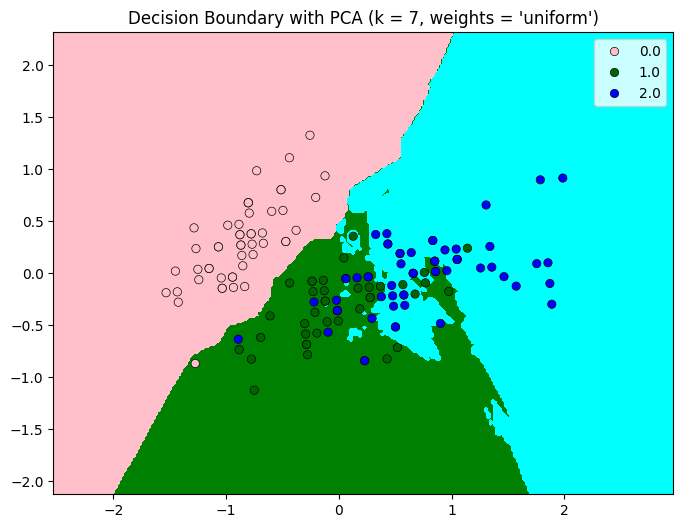

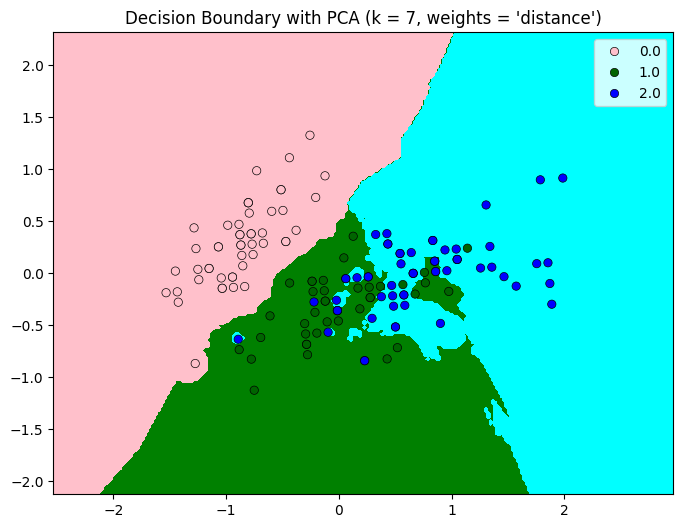

In [31]:
#Decision boundaries :
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def decision_boundary_plot_pca(x, y, k):

    pca = PCA(n_components=2)
    x_dec = pca.fit_transform(x)

    h = 0.02

    n = len(set(y))
    cmap_light = ListedColormap(['pink', 'green', 'cyan', 'yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue', 'yellow'][:n]

    for weights in ['uniform', 'distance']:

        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y)


        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)


        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Decision Boundary with PCA (k = {k}, weights = '{weights}')")

    plt.show()


x_pts = X[:,:2]
y_pts = y
decision_boundary_plot_pca(x_pts,y_pts,7)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [32]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [33]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [35]:
from sklearn import preprocessing

for x in car_df.select_dtypes(include=['object', 'category']).columns:
    le = preprocessing.LabelEncoder()
    car_df[x] = le.fit_transform(car_df[x])


car_df = car_df.fillna('missing')  # Replace NaN with a placeholder
for x in car_df.select_dtypes(include=['object', 'category']).columns:
    le = preprocessing.LabelEncoder()
    car_df[x] = le.fit_transform(car_df[x])


car_df = car_df.astype(str)  # Convert all values to string
for x in car_df.columns:
    le = preprocessing.LabelEncoder()
    car_df[x] = le.fit_transform(car_df[x])

car_df = pd.get_dummies(car_df, drop_first=True)
print(car_df.dtypes)


buying price        int64
maintenance cost    int64
num_doors           int64
num_persons         int64
lug_boot            int64
safety              int64
decision            int64
dtype: object


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert all columns to numeric if necessary
car_df = car_df.apply(LabelEncoder().fit_transform)

# Convert to NumPy array
dataset = car_df.values

# Extract features and target
X = dataset[:, 0:6]
y = dataset[:, 6]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Verify shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1381, 6)
y_train shape: (1381,)


In [39]:
def accuracy_score(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


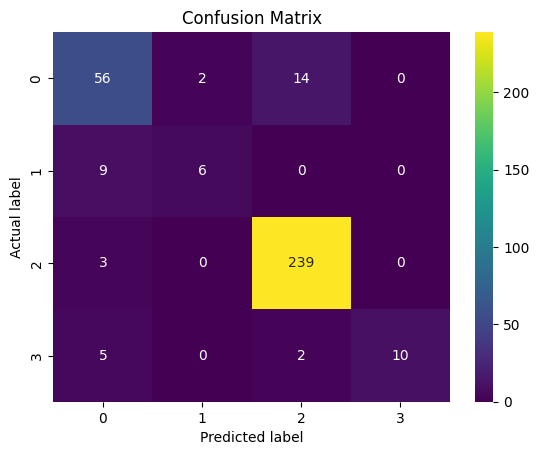

In [41]:
#Task 3: Confusion matrix for above car dataset
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predictions_encoded = le.transform(predictions)

cnf_matrix = metrics.confusion_matrix(y_test_encoded, predictions_encoded)


labels = le.classes_
sns.heatmap(pd.DataFrame(cnf_matrix, index=labels, columns=labels), annot=True, cmap="viridis", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [42]:
# Task-4
#Classification report for the car dataset:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



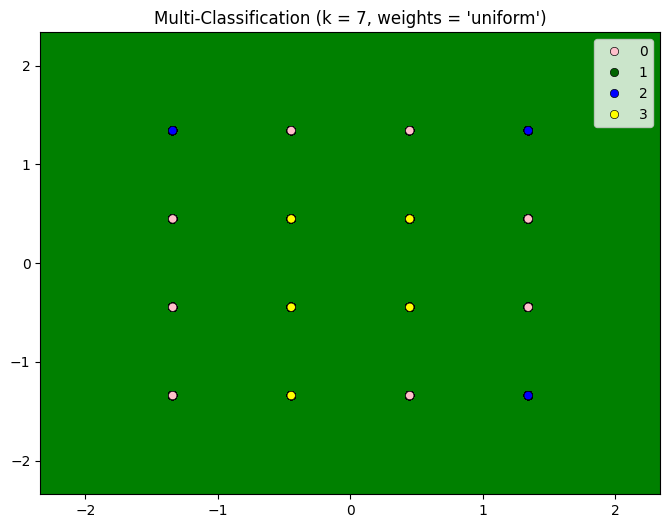

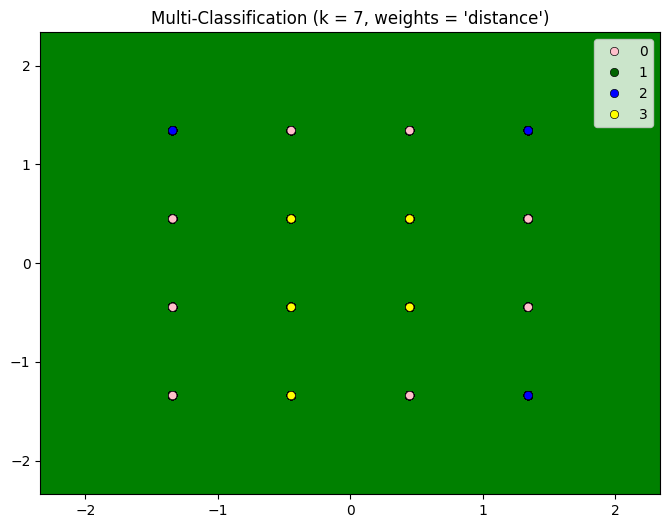

In [44]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)


      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)


      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()

le_x = LabelEncoder()
X = car_df.iloc[:, :-1].apply(le_x.fit_transform).values
y = LabelEncoder().fit_transform(car_df.iloc[:, -1])

scaler = StandardScaler()
X = scaler.fit_transform(X)


x_pts = X[:, :2]
y_pts = y
decision_boundary_plot(x_pts, y_pts, 7)

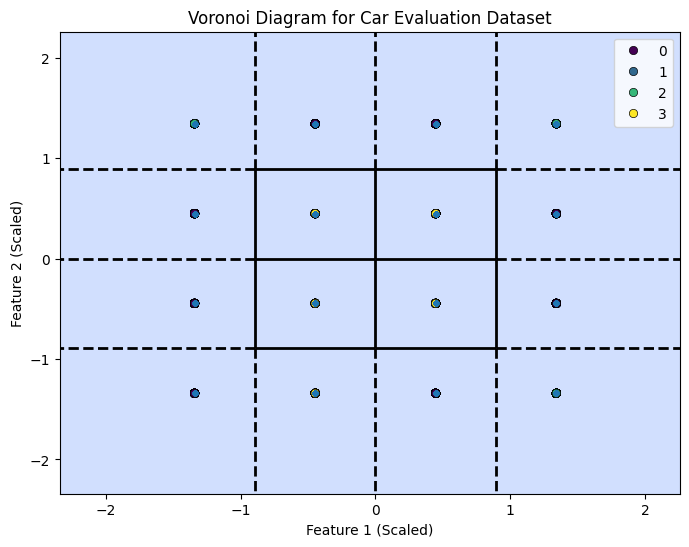

In [45]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neighbors import KNeighborsClassifier

# Encode the categorical features and labels
le_x = LabelEncoder()
X = car_df.iloc[:, :-1].apply(le_x.fit_transform).values  # Encode all feature columns
y = LabelEncoder().fit_transform(car_df.iloc[:, -1])     # Encode target labels

# Standardize features for better classification
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use the first two features for the Voronoi plot
x_pts = X[:, :2]
y_pts = y

# Function to plot Voronoi Diagram
def voronoi_plot_car_data(x_dec, y_dec):
    # Create a classifier
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(x_dec, y_dec)


    vor = Voronoi(x_dec)


    fig, ax = plt.subplots(figsize=(8, 6))


    cmap = plt.cm.coolwarm
    x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
    y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)


    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2)


    sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec, palette='viridis', alpha=1.0, edgecolor="black", ax=ax)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title('Voronoi Diagram for Car Evaluation Dataset')
    ax.set_xlabel('Feature 1 (Scaled)')
    ax.set_ylabel('Feature 2 (Scaled)')
    plt.show()


voronoi_plot_car_data(x_pts, y_pts)
